<a href="https://colab.research.google.com/github/tetiana-martynenko/Python-For-DS/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [2]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 49.5 MB/s eta 0:00:00


In [3]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [4]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [29]:
import pandas as pd

In [30]:
df = pd.read_sql("select * from employees", con)
df.head(5)

<ipython-input-30-793867278620>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select * from employees", con)


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [45]:
df = pd.read_sql("select year(hire_date)as hire_year, count(emp_no) as emp_num from employees group by hire_year order by hire_year", con)
df

<ipython-input-45-ae4e39dcd85e>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select year(hire_date)as hire_year, count(emp_no) as emp_num from employees group by hire_year order by hire_year", con)


,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [46]:
import matplotlib.pyplot as plt


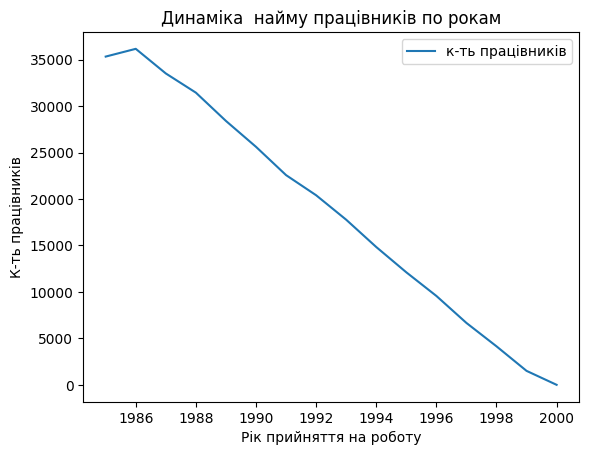

In [52]:
plt.plot(df['hire_year'], df['emp_num'], label='к-ть працівників')
plt.xlabel('Рік прийняття на роботу')
plt.ylabel('К-ть працівників')
plt.title('Динаміка  найму працівників по рокам')
plt.legend();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [56]:
df_years = pd.read_sql("SELECT TIMESTAMPDIFF(YEAR, from_date, to_date) as duration, from_date, to_date FROM employees.titles where title = 'Engineer' and to_date != '9999-01-01'", con)

<ipython-input-56-0cd5abd840bf>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql("SELECT TIMESTAMPDIFF(YEAR, from_date, to_date) as duration, from_date, to_date FROM employees.titles where title = 'Engineer' and to_date != '9999-01-01'", con)


In [57]:
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

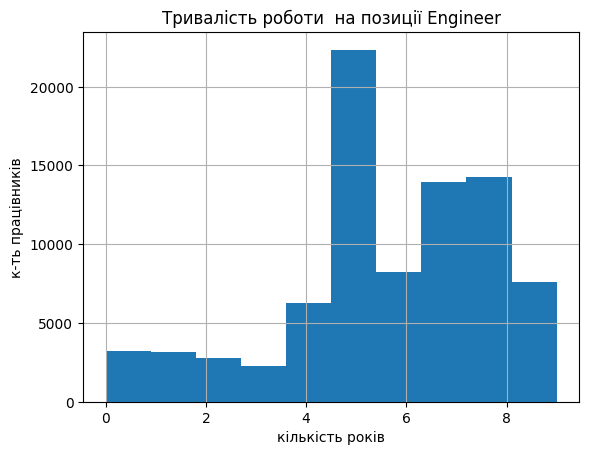

In [62]:
plt.hist(df_years['duration'])
plt.xlabel('кількість років')
plt.ylabel('к-ть працівників')
plt.title('Тривалість роботи  на позиції Engineer')
plt.grid();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [63]:
con.close()